In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
#covid19_country_wise_latest.csv

In [133]:
dt = pd.read_csv('Data/covid19_country_wise_latest.csv')
dt

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [134]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [135]:
dt.drop(columns=['Deaths / 100 Cases','Recovered / 100 Cases','Deaths / 100 Recovered','Confirmed last week','1 week change',r'1 week % increase'],inplace=True)
dt

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,Africa
3,Andorra,907,52,803,52,10,0,0,Europe
4,Angola,950,41,242,667,18,1,0,Africa
...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,Africa
184,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,Africa


#### 1.Dùng kiểm định Pearson để kiểm tra mối tương quan giữa các thuộc tính sau: Tổng số ca nhiễm (Confirmed) và Tổng số ca tử vong (Deaths), số ca nhiễm mới (New cases) và số ca tử vong mới (New deaths), tổng số ca đang điều trị (Active) và số ca mới khỏi bệnh (New recoverd)

##### Tổng số ca nhiễm (Confirmed) và Tổng số ca tử vong (Deaths)

In [136]:
r, pvalue = pearsonr(list(dt['Confirmed']),list(dt['Deaths']))
print ('r =', r)
print ('pvalue =',pvalue)

r = 0.9346984343393534
pvalue = 4.885639945770688e-85


    - H0: 2 thuộc tính không tương quan với nhau
    - HA: 2 thuộc tính có mối quan hệ với nhau

Do pvalue < alpha = 0.05. nên H0 được loại bỏ, HA được chấp nhận. Giữa các thuộc tính có tương quan. Pvalue gần bằng 0, mối quan hệ giữa hai thuộc tính rất chặt chẽ

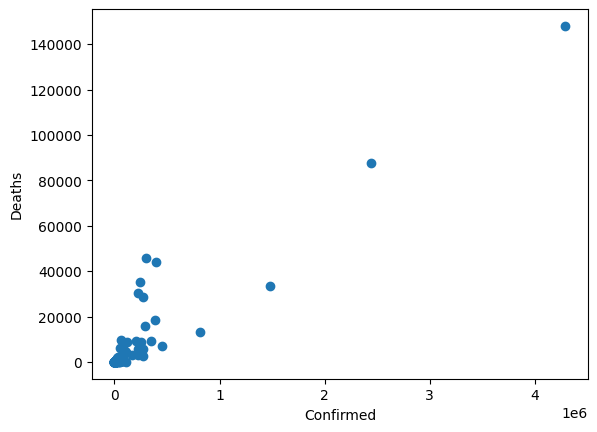

In [137]:
plt.scatter(x=list(dt['Confirmed']), y = list(dt['Deaths']))
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

##### số ca nhiễm mới (New cases) và số ca tử vong mới (New deaths)

In [138]:
r, pvalue = pearsonr(list(dt['New cases']),list(dt['New deaths']))
print ('r =', r)
print ('pvalue =',pvalue)

r = 0.935946577522312
pvalue = 8.689427183573231e-86


    - H0: 2 thuộc tính không tương quan với nhau
    - HA: 2 thuộc tính có mối quan hệ với nhau

Do pvalue < alpha = 0.05. nên H0 được loại bỏ, HA được chấp nhận. Giữa các thuộc tính có tương quan. Pvalue gần bằng 0, mối quan hệ giữa hai thuộc tính rất chặt chẽ

##### tổng số ca đang điều trị (Active) và số ca mới khỏi bệnh (New recoverd)

In [139]:
r, pvalue = pearsonr(list(dt['Active']),list(dt['New recovered']))
print ('r =', r)
print ('pvalue =',pvalue)

r = 0.6738870306866048
pvalue = 4.1461636825499366e-26


    - H0: 2 thuộc tính không tương quan với nhau
    - HA: 2 thuộc tính có mối quan hệ với nhau

Do pvalue < alpha = 0.05. nên H0 được loại bỏ, HA được chấp nhận. Giữa các thuộc tính có tương quan. Pvalue gần bằng 0, mối quan hệ giữa hai thuộc tính rất chặt chẽ

### 2. Dùng kiểm định Chi-bình phương để kiểm tra mối tương quan giữa các châu lục với các thuộc tính tổng số ca nhiễm (Confirmed), tổng số ca tử vong ('Deaths'), Tổng số ca khỏi bệnh ('Recovered) và tổng số ca đang ddieefuf trị (Active)

In [140]:
from scipy.stats import chi2_contingency

In [141]:
dt

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,Africa
3,Andorra,907,52,803,52,10,0,0,Europe
4,Angola,950,41,242,667,18,1,0,Africa
...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,Africa
184,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,Africa


In [142]:
Regiondt = dt.groupby('WHO Region')['Confirmed','Deaths','Recovered','Active'].sum()
Regiondt

C:\Users\Admin-s\AppData\Local\Temp\ipykernel_18660\2698934119.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Regiondt = dt.groupby('WHO Region')['Confirmed','Deaths','Recovered','Active'].sum()


,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,723207,12223,440645,270339
Americas,8839286,342732,4468616,4027938
Eastern Mediterranean,1490744,38339,1201400,251005
Europe,3299523,211144,1993723,1094656
South-East Asia,1835297,41349,1156933,637015
Western Pacific,292428,8249,206770,77409


In [143]:
data = [Regiondt.iloc[0][Regiondt.columns[0:]].values,\
        Regiondt.iloc[1][Regiondt.columns[0:]].values]
data

[array([723207,  12223, 440645, 270339], dtype=int64),
 array([8839286,  342732, 4468616, 4027938], dtype=int64)]

In [144]:
chi, p, dof, expected = chi2_contingency(data)
print('Chi-square value =',chi)
print('Pvalue =',p)
print('DDefgree of freeddoom =',dof)
print('Expected table =',expected)

Chi-square value = 32604.34259183815
Pvalue = 0.0
DDefgree of freeddoom = 3
Expected table = [[ 723207.           26845.08534385  371285.17845995  325076.7361962 ]
 [8839286.          328109.91465615 4537975.82154005 3973200.2638038 ]]


    - H0: vị trí châu lục và các chỉ số không liên quan đến nhau.
    - HA: vị trí châu lục và các chỉ số có liên quan chặt chẽ đến nhau.

Vì Pvalue = 0.0 nên các chỉ số trên không liên quan đến vị trí châu lục

### 3. Dùng kiểm định Spearman để kiểm định mối tương quuan giữa các thuộc tính như câu 1

##### Tổng số ca nhiễm (Confirmed) và Tổng số ca tử vong (Deaths)

In [145]:
Confirmed = sorted(dt['Confirmed'].unique(),reverse=True)
rank_Confirmed = {Confirmed[i]: i+1 for i in range(len(Confirmed))}
rank_Confirmed

{4290259: 1,
 2442375: 2,
 1480073: 3,
 816680: 4,
 452529: 5,
 395489: 6,
 389717: 7,
 347923: 8,
 301708: 9,
 293606: 10,
 274289: 11,
 272421: 12,
 268934: 13,
 257101: 14,
 246286: 15,
 227019: 16,
 226225: 17,
 220352: 18,
 207112: 19,
 167416: 20,
 116458: 21,
 112585: 22,
 109597: 23,
 100303: 24,
 92482: 25,
 86783: 26,
 84648: 27,
 82040: 28,
 81161: 29,
 79395: 30,
 77058: 31,
 71181: 32,
 67251: 33,
 67096: 34,
 66428: 35,
 64379: 36,
 64156: 37,
 63985: 38,
 61442: 39,
 59177: 40,
 53413: 41,
 50838: 42,
 50299: 43,
 45902: 44,
 45309: 45,
 43402: 46,
 41180: 47,
 39741: 48,
 39482: 49,
 37390: 50,
 36263: 51,
 34477: 52,
 33624: 53,
 33296: 54,
 31142: 55,
 30446: 56,
 27973: 57,
 25892: 58,
 24141: 59,
 23154: 60,
 21209: 61,
 20887: 62,
 20558: 63,
 18752: 64,
 17975: 65,
 17110: 66,
 15988: 67,
 15841: 68,
 15655: 69,
 15516: 70,
 15303: 71,
 15035: 72,
 14547: 73,
 14203: 74,
 13761: 75,
 11424: 76,
 10621: 77,
 10498: 78,
 10213: 79,
 9764: 80,
 9690: 81,
 9132: 82,
 

In [146]:
rank = pd.Series(rank_Confirmed)
c = dt['Confirmed']
dt['Confirmed_Rank'] = c.map(rank)
dt

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Confirmed_Rank
0,Afghanistan,36263,1269,25198,9796,106,10,18,Eastern Mediterranean,51
1,Albania,4880,144,2745,1991,117,6,63,Europe,95
2,Algeria,27973,1163,18837,7973,616,8,749,Africa,57
3,Andorra,907,52,803,52,10,0,0,Europe,144
4,Angola,950,41,242,667,18,1,0,Africa,142
...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,77
183,Western Sahara,10,1,8,1,0,0,0,Africa,184
184,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,129
185,Zambia,4552,140,2815,1597,71,1,465,Africa,97


In [147]:
Deaths = sorted(dt['Deaths'].unique(),reverse=True)
rank_Death = {Deaths[i]: i+1 for i in range(len(Deaths))}
rank_Death

{148011: 1,
 87618: 2,
 45844: 3,
 44022: 4,
 35112: 5,
 33408: 6,
 30212: 7,
 28432: 8,
 18418: 9,
 15912: 10,
 13334: 11,
 9822: 12,
 9187: 13,
 9125: 14,
 8944: 15,
 8777: 16,
 7067: 17,
 6160: 18,
 5842: 19,
 5700: 20,
 5630: 21,
 5532: 22,
 4838: 23,
 4656: 24,
 4652: 25,
 4458: 26,
 3059: 27,
 2965: 28,
 2760: 29,
 2647: 30,
 2206: 31,
 1978: 32,
 1945: 33,
 1764: 34,
 1761: 35,
 1719: 36,
 1676: 37,
 1636: 38,
 1322: 39,
 1301: 40,
 1269: 41,
 1166: 42,
 1163: 43,
 1083: 44,
 998: 45,
 860: 46,
 748: 47,
 720: 48,
 713: 49,
 711: 50,
 613: 51,
 596: 52,
 585: 53,
 543: 54,
 538: 55,
 483: 56,
 474: 57,
 466: 58,
 438: 59,
 423: 60,
 408: 61,
 393: 62,
 391: 63,
 373: 64,
 347: 65,
 345: 66,
 329: 67,
 316: 68,
 300: 69,
 294: 70,
 285: 71,
 255: 72,
 228: 73,
 208: 74,
 202: 75,
 194: 76,
 185: 77,
 168: 78,
 167: 79,
 165: 80,
 158: 81,
 156: 82,
 146: 83,
 144: 84,
 141: 85,
 140: 86,
 139: 87,
 124: 88,
 121: 89,
 116: 90,
 115: 91,
 112: 92,
 108: 93,
 99: 94,
 96: 95,
 93: 

In [148]:
rank = pd.Series(rank_Death)
c = dt['Deaths']
dt['Deaths_Rank'] = c.map(rank)
dt

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Confirmed_Rank,Deaths_Rank
0,Afghanistan,36263,1269,25198,9796,106,10,18,Eastern Mediterranean,51,41
1,Albania,4880,144,2745,1991,117,6,63,Europe,95,84
2,Algeria,27973,1163,18837,7973,616,8,749,Africa,57,43
3,Andorra,907,52,803,52,10,0,0,Europe,144,111
4,Angola,950,41,242,667,18,1,0,Africa,142,120
...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,77,100
183,Western Sahara,10,1,8,1,0,0,0,Africa,184,149
184,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,129,56
185,Zambia,4552,140,2815,1597,71,1,465,Africa,97,86


In [149]:
from scipy import stats
r, pvalue = stats.spearmanr(dt['Confirmed_Rank'], dt['Deaths_Rank'])
print ('r = ', r)
print ('pvalue = ', pvalue)

r =  0.9388677588651781
pvalue =  1.3275870217453405e-87


    - H0: Giữa hai thuộc tính Confirmed và Deaths không có sự tương quan với nhau
    - HA: Giữa hai thuộc tính Confirmed và Deaths này có sự tương quan với nhau

Do pvalue < alpha = 0.05. nên H0 được loại bỏ, HA được chấp nhận. Giữa các thuộc tính có tương quan. Pvalue gần bằng 0, mối quan hệ giữa hai thuộc tính rất chặt chẽ